In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [4]:
# For creating model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [5]:
!pip install pandas tensorflow
import tensorflow as tf

In [6]:
df = pd.read_csv ("/content/preprocessed_train_data.csv")

In [7]:
df.head()

,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849.0,121.0,360.0,1.0,Y,1,0,0,0,0,0,1
1,0,1,1,0,6091.0,128.0,360.0,1.0,N,0,1,0,0,1,0,0
2,0,1,1,1,3000.0,66.0,360.0,1.0,Y,1,0,0,0,0,0,1
3,0,1,0,0,4941.0,120.0,360.0,1.0,Y,1,0,0,0,0,0,1
4,0,0,1,0,6000.0,141.0,360.0,1.0,Y,1,0,0,0,0,0,1


In [8]:
df.describe()

,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,0.185619,0.648829,0.777592,0.130435,6923.752375,144.259480,342.341137,0.856187,0.571906,0.182274,0.165552,0.080268,0.292642,0.376254,0.331104
std,0.389124,0.477736,0.416212,0.337063,6220.893093,81.332436,64.494977,0.351193,0.495217,0.386394,0.371989,0.271934,0.455356,0.484851,0.471004
min,0.000000,0.000000,0.000000,0.000000,1442.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,4154.750000,100.000000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,5416.500000,125.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,7452.500000,163.500000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,650.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.dtypes

Gender                       int64
Married                      int64
Education                    int64
Self_Employed                int64
Total_Income               float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Dependents_0                 int64
Dependents_1                 int64
Dependents_2                 int64
Dependents_3+                int64
Property_Area_Rural          int64
Property_Area_Semiurban      int64
Property_Area_Urban          int64
dtype: object

In [10]:

# Check for null values
df['Loan_Status'].isnull().sum()


0

In [11]:
df_dummied = pd.get_dummies(df[['Loan_Status']], dtype='int')
df_dummied

,Loan_Status_N,Loan_Status_Y
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
593,0,1
594,0,1
595,0,1
596,0,1


In [12]:
# Encoding Loan_Status Column by setting yes as 1 and no as 0
# Null values will also be encoded as 0 using this method
def encode_loan(loan):
    if loan == "Y":
        return 1
    else:
        return 0

# Call the encode_loan function on the Loan_Status column
df["Loan_Status"] = df["Loan_Status"].apply(encode_loan)

# Review the DataFrame
df.head()

,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849.0,121.0,360.0,1.0,1,1,0,0,0,0,0,1
1,0,1,1,0,6091.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,0,1,1,1,3000.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,0,1,0,0,4941.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,0,0,1,0,6000.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1


In [12]:
# Principal Component Analysis for Reduction
from sklearn.decomposition import PCA

# For Shuffling the DataFrame
from sklearn.utils import shuffle

In [13]:
# Split our preprocessed data into our features and target arrays
X = df.drop("Loan_Status", axis=1)
y = df.Loan_Status

In [14]:
X

,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849.0,121.0,360.0,1.0,1,0,0,0,0,0,1
1,0,1,1,0,6091.0,128.0,360.0,1.0,0,1,0,0,1,0,0
2,0,1,1,1,3000.0,66.0,360.0,1.0,1,0,0,0,0,0,1
3,0,1,0,0,4941.0,120.0,360.0,1.0,1,0,0,0,0,0,1
4,0,0,1,0,6000.0,141.0,360.0,1.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,0,1,0,2900.0,71.0,360.0,1.0,1,0,0,0,1,0,0
594,0,1,1,0,4106.0,40.0,180.0,1.0,0,0,0,1,1,0,0
595,0,1,1,0,8312.0,253.0,360.0,1.0,0,1,0,0,0,0,1
596,0,1,1,0,7583.0,187.0,360.0,1.0,0,0,1,0,0,0,1


In [15]:
y

0      1
1      0
2      1
3      1
4      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 598, dtype: int64

In [16]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Define the model - deep neural net with 3 Hidden Layers, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
nn = tf.keras.models.Sequential()

nn = tf.keras.models.Sequential()

In [19]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 112       
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 21)                315       
                                                                 
 dense_3 (Dense)             (None, 1)                 22        
                                                                 
Total params: 561 (2.19 KB)
Trainable params: 561 (2.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [21]:
# Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}".format(model_loss, model_accuracy))
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


5/5 - 2s - loss: 0.7296 - accuracy: 0.3867 - 2s/epoch - 351ms/step
Loss: 0.729600191116333, Accuracy: 0.3866666555404663


In [22]:
# Define the model - deep neural net with 6 Hidden Layers, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
hidden_nodes_layer4=21
hidden_nodes_layer5=28
hidden_nodes_layer6=28
nn = tf.keras.models.Sequential()

nn = tf.keras.models.Sequential()

In [23]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='tanh'))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation='linear'))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation='softmax'))

# Sixth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation='gelu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 112       
                                                                 
 dense_5 (Dense)             (None, 14)                112       
                                                                 
 dense_6 (Dense)             (None, 21)                315       
                                                                 
 dense_7 (Dense)             (None, 21)                462       
                                                                 
 dense_8 (Dense)             (None, 28)                616       
                                                                 
 dense_9 (Dense)             (None, 28)                812       
                                                                 
 dense_10 (Dense)            (None, 1)                

In [24]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [25]:
# Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}".format(model_loss, model_accuracy))
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


5/5 - 0s - loss: 0.6900 - accuracy: 0.6933 - 324ms/epoch - 65ms/step
Loss: 0.6899541616439819, Accuracy: 0.6933333277702332


In [ ]:
Making Predictions Using the Tree Model

In [26]:
!pip install Graphviz

In [27]:
!pip install pydotplus

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image
from sklearn import tree

In [29]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier(max_depth=4)

In [30]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

In [31]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [32]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_test)

In [33]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Model Evaluation

In [35]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score


0.7666666666666667

In [36]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,15,31
Actual 1,4,100


Accuracy Score : 0.7666666666666667
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.33      0.46        46
           1       0.76      0.96      0.85       104

    accuracy                           0.77       150
   macro avg       0.78      0.64      0.66       150
weighted avg       0.77      0.77      0.73       150



Visualizing the Decision Tree

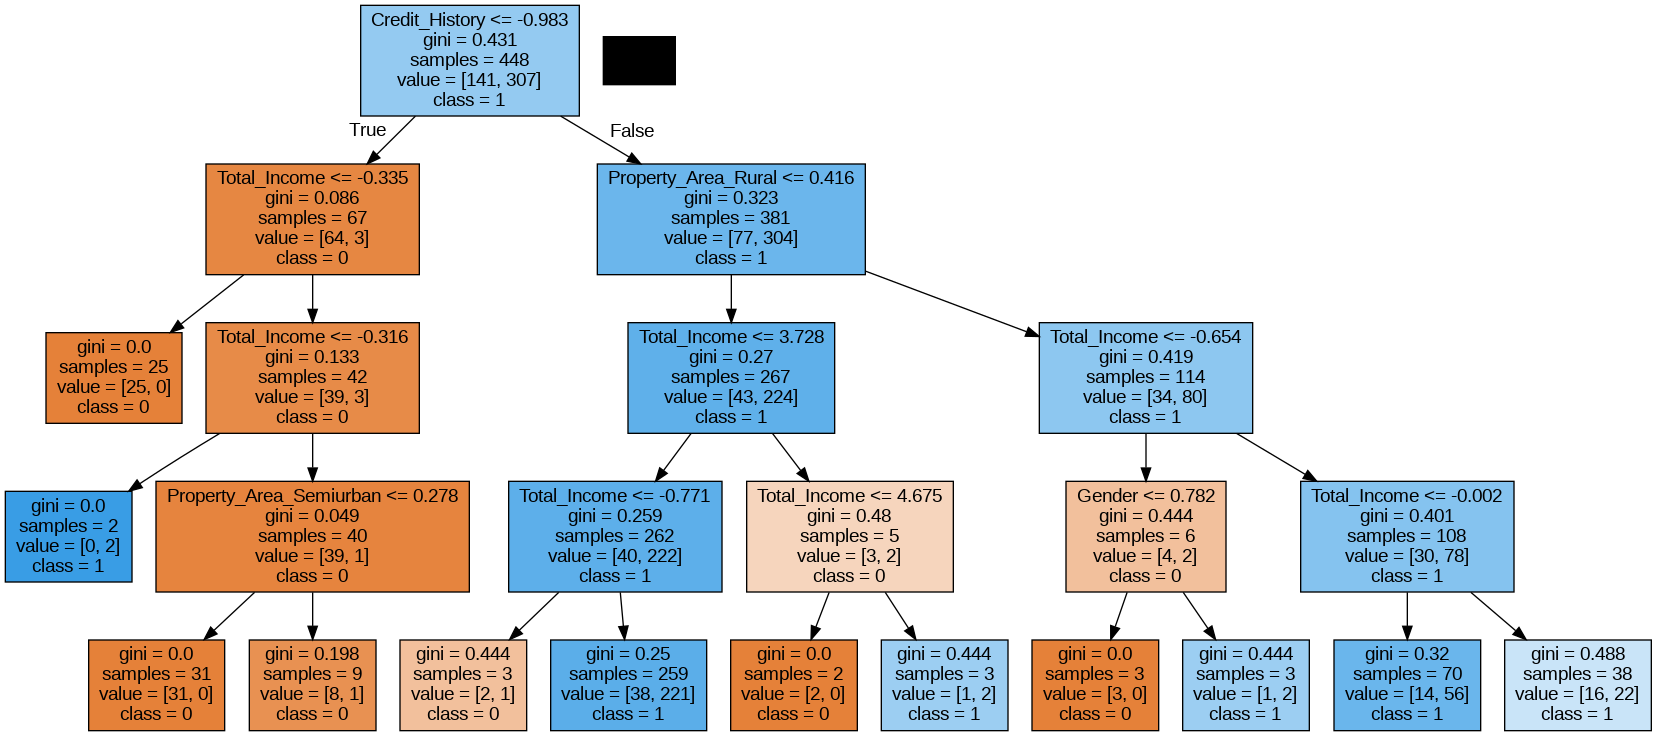

In [37]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


In [38]:
# When saving the image, Path() is not used because graph.write_<file_type>() must take a string object

# Saving the tree as PDF
file_path = "lending_tree.pdf"
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = "lending_tree.png"
graph.write_png(file_path)

True

Create a Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

Fit(Train) or Model Using the Training Data

In [40]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

Score the Model Using Test Data

In [41]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8214285714285714
Testing Data Score: 0.7666666666666667


Make Predictions

In [42]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1,0
1,1,1
2,1,0
3,1,1
4,1,1
5,1,1
6,1,0
7,1,1
8,0,1
9,1,1


Calculate the Accuracy Score

In [43]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.7666666666666667

Making Predictions Using the Random Forest

In [44]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [45]:
# Fit the model and use .ravel()on the "y_train" data.
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [46]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.78

In [48]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,19,27
Actual 1,6,98


Accuracy Score : 0.78
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.41      0.54        46
           1       0.78      0.94      0.86       104

    accuracy                           0.78       150
   macro avg       0.77      0.68      0.70       150
weighted avg       0.78      0.78      0.76       150



In [49]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.2780519629197567, 'Credit_History'),
 (0.23996092309229708, 'Total_Income'),
 (0.21316330537877512, 'LoanAmount'),
 (0.0370048117151294, 'Loan_Amount_Term'),
 (0.028493847557771054, 'Education'),
 (0.02682100557423989, 'Married'),
 (0.025262045193459197, 'Gender'),
 (0.024811366716229286, 'Self_Employed'),
 (0.02154119501809056, 'Property_Area_Semiurban'),
 (0.019971562684050995, 'Property_Area_Rural')]

Support Vector Classifier

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [51]:
# Create an SVC model
model = SVC()


In [52]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.68


In [53]:
import seaborn as sb
sb.set()

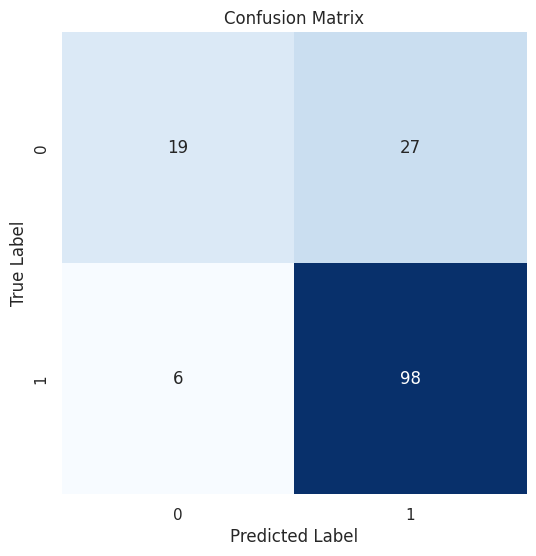

In [54]:
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Making Predictions Using XGBoost

In [55]:
!pip install xgboost

In [56]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:

# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [59]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.33%


In [60]:
# First XGBoost model dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = pd.read_csv('/content/preprocessed_train_data.csv', delimiter=",")

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.25%


In [61]:
!pip install pycaret

<Axes: title={'center': 'Education'}>

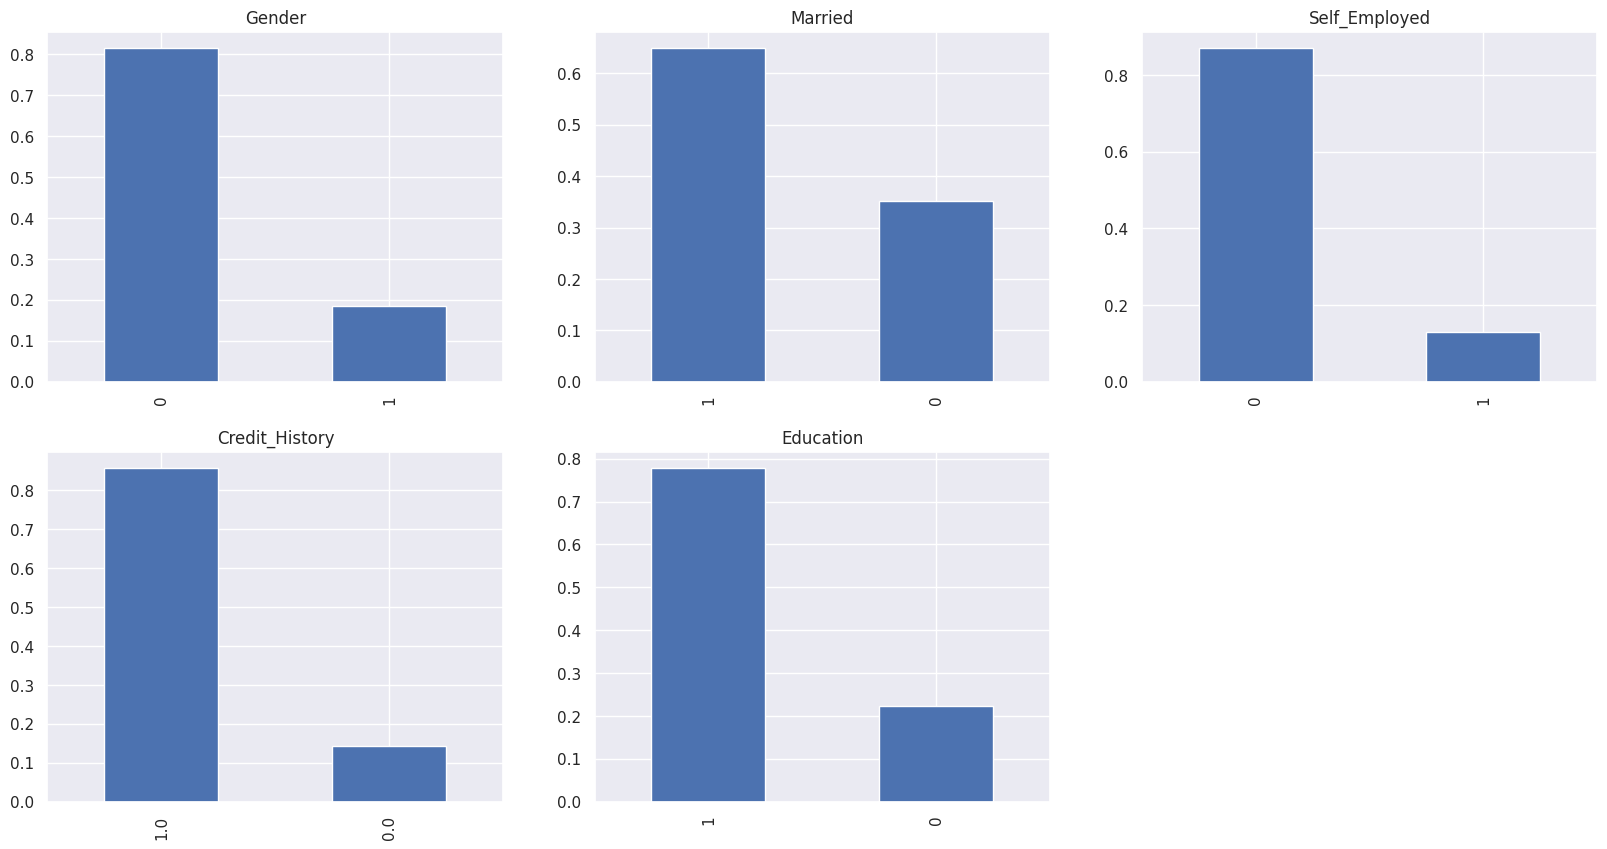

In [ ]:

# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

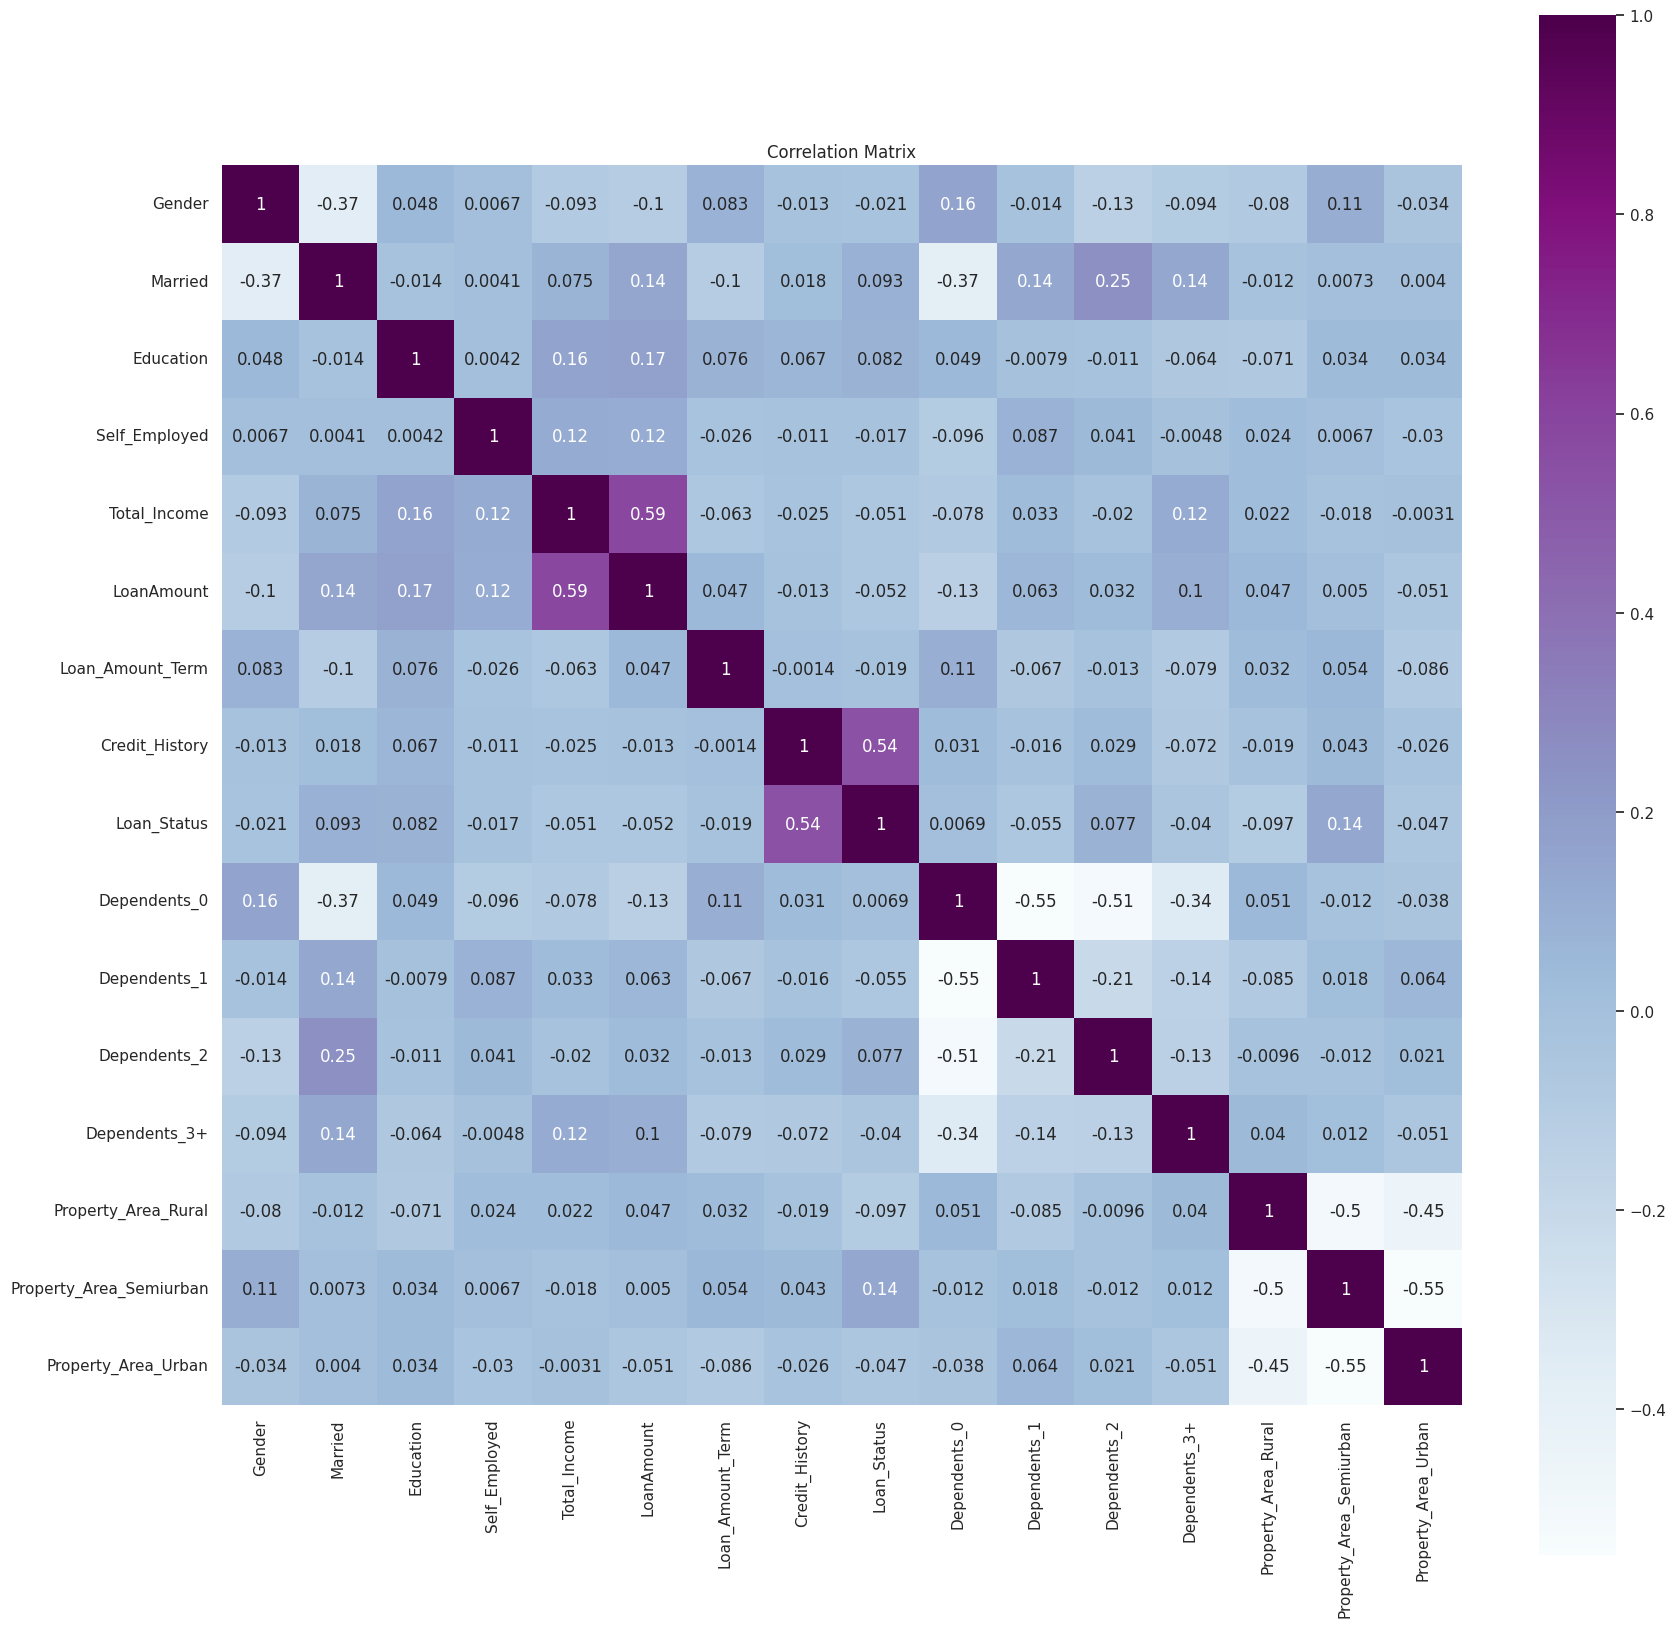

In [62]:
# calculate and visualize correlation matrix
matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix
plt.title("Correlation Matrix")
plt.savefig('correlation_matrix.png')

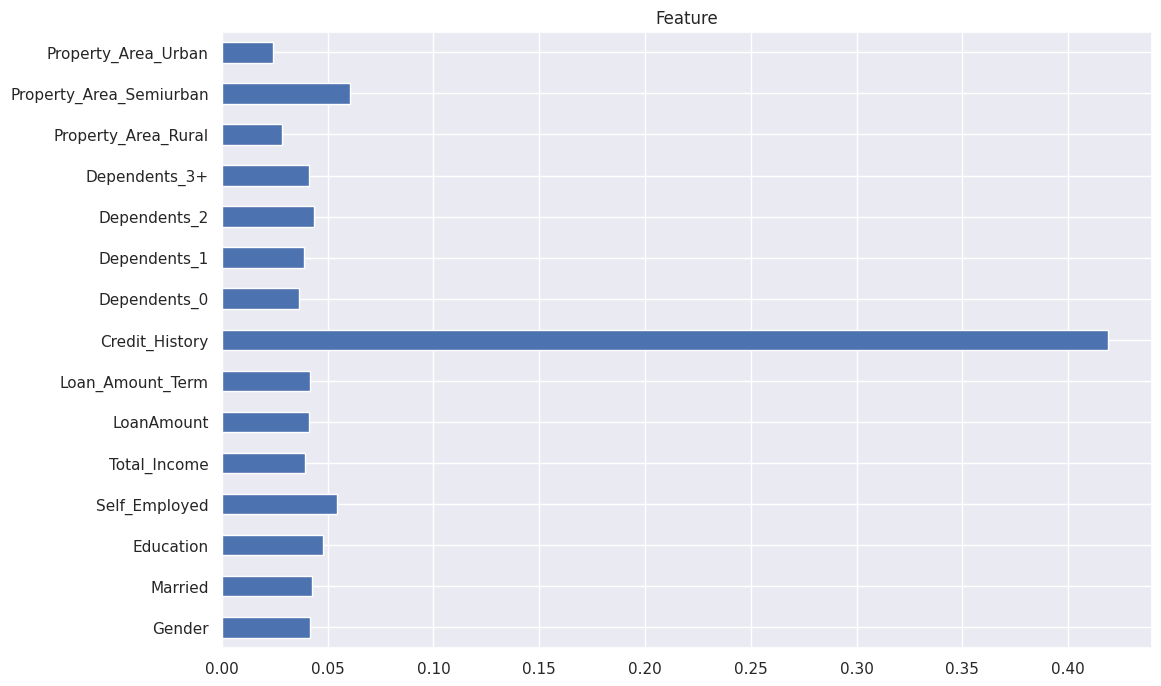

In [ ]:
# extract feature importances, convert into a Series
importances = pd.Series(model.feature_importances_, index=X.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))
plt.title("Feature")
plt.savefig('feature_importance.png')

In [ ]:
# load dataset
from pycaret.datasets import get_data


In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn

Found existing installation: scikit-learn 1.4.1.post1
Uninstalling scikit-learn-1.4.1.post1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.4.1.post1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.4.1.post1
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)


In [63]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'Loan_Status')

# compare models
best = compare_models(sort = 'Prec.')
plt.savefig('model_comparison.png')

,Description,Value
0,Session id,8410
1,Target,Loan_Status
2,Target type,Binary
3,Original data shape,"(598, 16)"
4,Transformed data shape,"(598, 16)"
5,Transformed train set shape,"(418, 16)"
6,Transformed test set shape,"(180, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7703,0.7872,0.8782,0.8092,0.8406,0.4310,0.4410,0.6350
gbc,Gradient Boosting Classifier,0.7942,0.7591,0.9234,0.8080,0.8610,0.4722,0.4907,0.1740
rf,Random Forest Classifier,0.7846,0.7445,0.9057,0.8063,0.8524,0.4578,0.4710,0.3780
dt,Decision Tree Classifier,0.7153,0.6775,0.7808,0.8031,0.7901,0.3461,0.3500,0.0460
ada,Ada Boost Classifier,0.7847,0.7434,0.9236,0.8012,0.8557,0.4386,0.4687,0.1480
xgboost,Extreme Gradient Boosting,0.7535,0.7601,0.8569,0.8005,0.8268,0.3987,0.4039,0.1040
nb,Naive Bayes,0.7967,0.7478,0.9515,0.7956,0.8655,0.4622,0.5002,0.0660
et,Extra Trees Classifier,0.7390,0.7192,0.8462,0.7891,0.8162,0.3666,0.3709,0.2040
lr,Logistic Regression,0.7966,0.7510,0.9686,0.7874,0.8680,0.4461,0.4933,2.2080
ridge,Ridge Classifier,0.8015,0.0000,0.9825,0.7851,0.8723,0.4515,0.5111,0.0420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

<Figure size 800x550 with 0 Axes>

In [64]:
from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate some example data
# X, y = df(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Ridge Classifier model
ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train, y_train)

# Make predictions
y_pred = ridge_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8166666666666667


In [65]:
df.head()

,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849.0,121.0,360.0,1.0,1,1,0,0,0,0,0,1
1,0,1,1,0,6091.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,0,1,1,1,3000.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,0,1,0,0,4941.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,0,0,1,0,6000.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1


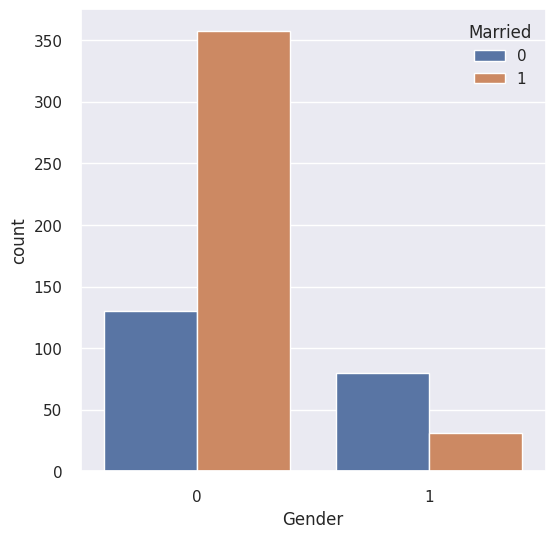

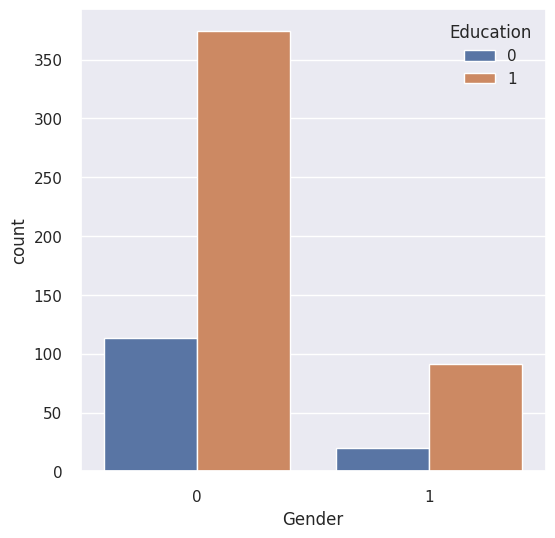

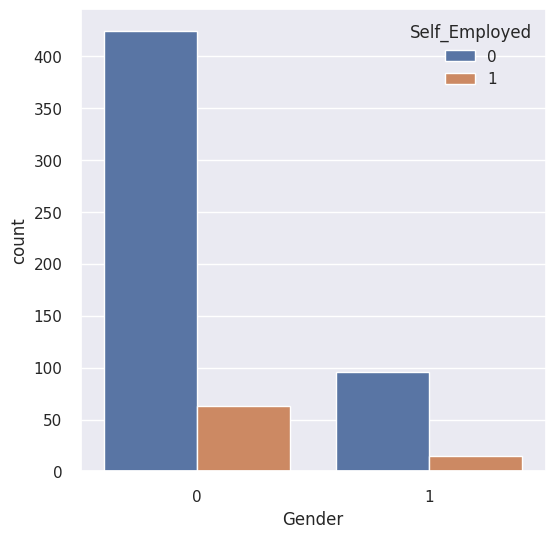

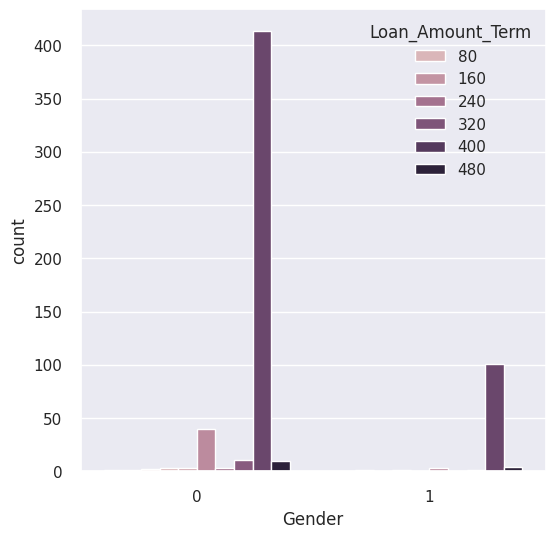

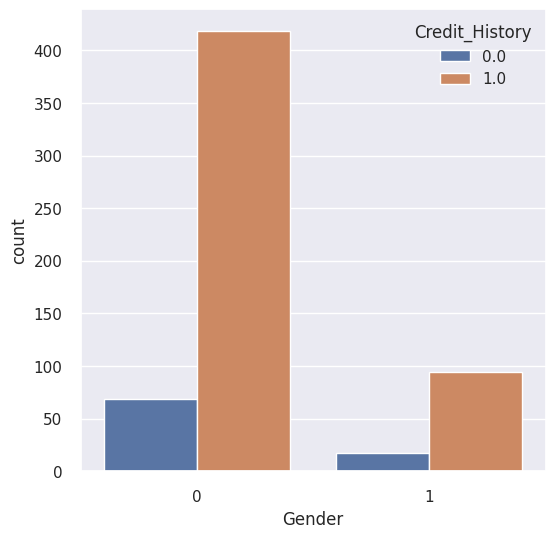

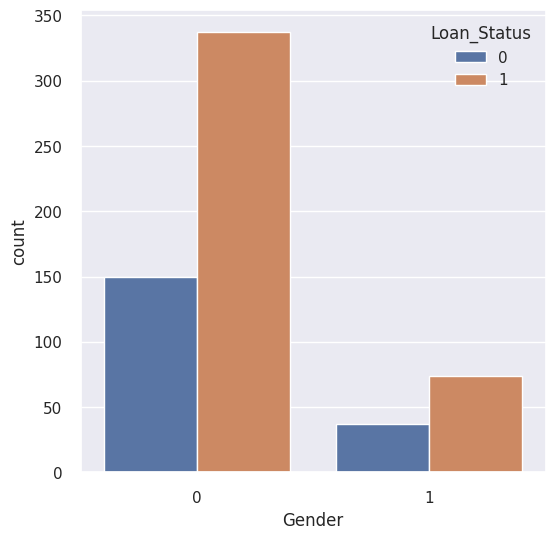

In [ ]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = df, hue = 'Married')
# plt.savefig('../images/gender_counts_1.png')
plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = df, hue = 'Dependents')
# # plt.savefig('../images/gender_counts_2.png')
# plt.show()

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = df, hue = 'Education')
# plt.savefig('../images/gender_counts_3.png')
plt.show()

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = df, hue = 'Self_Employed')
# plt.savefig('../images/gender_counts_4.png')
plt.show()

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = df, hue = 'Loan_Amount_Term')
# plt.savefig('../images/gender_counts_5.png')
plt.show()

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = df, hue = 'Credit_History')
# plt.savefig('../images/gender_counts_6.png')
plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = df, hue = 'Property_Area')
# # plt.savefig('../images/gender_counts_7.png')
# plt.show()

plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = df, hue = 'Loan_Status')
# plt.savefig('../images/gender_counts_8.png')
plt.show()